Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Read Data

In [2]:
file = pd.ExcelFile("../../../../data/final/Handball_09.03.2023_fertig.xlsx")

file.sheet_names

df = file.parse('2. League')

# drop last col comments & favorite corner & empy rows at end
df = df.iloc[:, :-1]
df.columns


Index(['Home team', 'Guest team', 'Matchday', 'Player 3rd league',
       'Shooter team', 'Game Minute',
       'Difference between\nfinal whistle and kickoff \n(in seconds)',
       'Home Goal', 'Guest Goal',
       'Goalkeeper position\n(0 = on the line;\n 1 = in front of the line)',
       'Goalkeeper name', 'Goalkeeper Club', 'Goalkeeper \nheight (cm)',
       'Thrower \nheight (cm)',
       'Toss successful?\n(0 = no; 1 = yes;\n 2 = yes, afterthrow',
       'Left/right \nhanded?\n(1 = right; 2 = left)', 'Throw direction',
       'Pressure situation?\n(0 = no; \n1= Goalkeeper change;\n2 = last 7 meter held; 3 = goal difference < 4 + from 50. minute; 4 = 1+2; 5 = 1+3; 6 = 2+3; 7 = 1+2+3; 8 = last 7 meter successful in follow-up throw\n',
       'Number of seven meters\n(of the player)',
       'Throw quadrant last 7 meter',
       'last 7 meter successful?\n(0 = no; 1 = yes; \n2 = yes, in the afterthrow'],
      dtype='object')

Cleanup & Renaming

In [3]:
df.replace('unklar', np.nan,inplace=True)
df.replace('unklar ', np.nan,inplace=True)
df.replace('fehlend', np.nan,inplace=True)
df.replace('-', np.nan,inplace=True)
df.replace(-99, np.nan,inplace=True)
df.replace('-99', np.nan,inplace=True)
#df.dropna(inplace=True)
df.columns = [ 'homeTeam','opponentTeam','day','name','team','playTime',
              'whistleThrowTime','homeGoals','opponentGoals',
              'goalKeeperPosition','goalKeeperName', 
              'goalkeeperTeam','goalKeeperHeightCM','shooterheightCM',
              'throwSuccess','LRHandy','throwDirection',
              'pressureSituation','noOfThrowsFromPlayer',
              'throwQuadrantLastThrow','lastThrowSuccess']
df = df.astype({'homeTeam':'string', 'opponentTeam':'string','day':'float16','name':'string','team':'string','playTime':'float16',
              'whistleThrowTime':'float16','homeGoals':'float16','opponentGoals':'float16','goalKeeperPosition':'float16',
              'goalKeeperName':'string','goalkeeperTeam':'string', 'goalKeeperHeightCM':'float16','shooterheightCM':'float16',
              'throwSuccess':'float16','LRHandy':'float16','throwDirection':'float16','pressureSituation':'float16','noOfThrowsFromPlayer':'float16',
              'throwQuadrantLastThrow':'float16','lastThrowSuccess':'float16', })
df.head()

,homeTeam,opponentTeam,day,name,team,playTime,whistleThrowTime,homeGoals,opponentGoals,goalKeeperPosition,...,goalkeeperTeam,goalKeeperHeightCM,shooterheightCM,throwSuccess,LRHandy,throwDirection,pressureSituation,noOfThrowsFromPlayer,throwQuadrantLastThrow,lastThrowSuccess
0,EHV Aue,TUSEM Essen,1.0,NBS,TUSEM Essen,10.0,NaN,5.0,3.0,NaN,...,EHV Aue,192.0,180.0,1.0,1.0,3.0,0.0,1.0,NaN,NaN
1,EHV Aue,TUSEM Essen,1.0,NBS,TUSEM Essen,15.0,NaN,8.0,4.0,NaN,...,EHV Aue,192.0,180.0,1.0,1.0,9.0,0.0,2.0,3.0,1.0
2,EHV Aue,TUSEM Essen,1.0,NBS,TUSEM Essen,34.0,NaN,15.0,14.0,NaN,...,EHV Aue,185.0,180.0,0.0,1.0,2.0,0.0,3.0,9.0,1.0
3,EHV Aue,TUSEM Essen,1.0,NBS,TUSEM Essen,39.0,NaN,18.0,17.0,NaN,...,EHV Aue,185.0,180.0,1.0,1.0,8.0,2.0,4.0,2.0,2.0
4,EHV Aue,TUSEM Essen,1.0,NBS,TUSEM Essen,43.0,NaN,19.0,19.0,NaN,...,EHV Aue,185.0,180.0,1.0,1.0,7.0,0.0,5.0,8.0,1.0


Cleaning

In [4]:
df = df.loc[:,('homeTeam','opponentTeam','throwDirection','throwSuccess','name')].copy()
# Naming correction
df['homeTeam'].replace('SV Salamander Kornwestheim.....', 'SV Salamander Kornwestheim 1894',inplace=True,regex=True)
df['opponentTeam'].replace('SV Salamander Kornwestheim.....', 'SV Salamander Kornwestheim 1894',inplace=True,regex=True)
df['throwSuccess'].replace(2.0, 1.0,inplace=True)
df.loc[0, 'penaltyNo'] = 1
for i in range(1, len(df)):
    df.loc[i, 'penaltyNo'] = df.loc[i-1, 'penaltyNo']+1 if df.loc[i-1, 'homeTeam'] == df.loc[i, 'homeTeam'] and df.loc[i-1, 'opponentTeam'] == df.loc[i, 'opponentTeam'] else 1
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
pd.set_option("display.max_rows", None, "display.max_columns", None)
#df.sort_index(ascending=True)

In [5]:
df1 =pd.crosstab(df['penaltyNo'], df['throwDirection'], margins=True, margins_name="Total") 
df1

throwDirection,1.0,2.0,3.0,4.0,6.0,7.0,8.0,9.0,Total
penaltyNo,,,,,,,,,
1.0,6,1,4,1,1,11,4,15,43
2.0,3,2,3,0,2,5,5,18,38
3.0,4,3,3,3,0,5,5,7,30
4.0,0,1,1,0,1,5,6,8,22
5.0,0,1,2,0,2,1,4,6,16
6.0,1,2,1,1,1,4,0,3,13
7.0,0,0,2,1,0,3,0,2,8
8.0,1,0,1,0,0,0,2,2,6
9.0,0,0,2,0,0,0,0,0,2


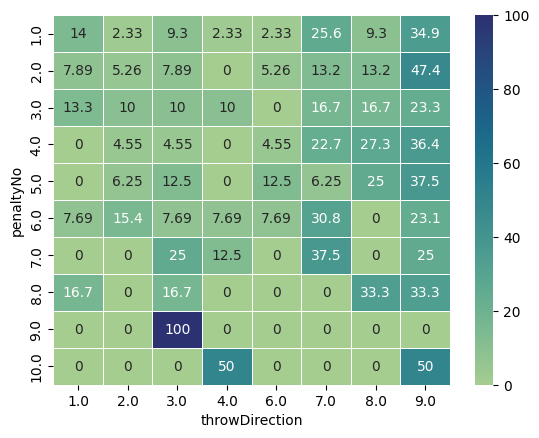

In [6]:
ax = sns.heatmap(pd.crosstab(df['penaltyNo'], df['throwDirection'], normalize='index')*100, linewidth=0.5, annot=True, cmap="crest",vmin=0,vmax=100,fmt='.3g')
#ax.xaxis.tick_top()
plt.show()

Success

In [7]:
dfs = df.loc[df['throwSuccess'] == 1]
df2 =pd.crosstab(dfs['penaltyNo'], dfs['throwDirection'], margins=True, margins_name="Total") 
df2

throwDirection,1.0,2.0,3.0,4.0,6.0,7.0,8.0,9.0,Total
penaltyNo,,,,,,,,,
1.0,5,1,3,1,0,9,3,13,35
2.0,3,1,2,0,2,2,5,13,28
3.0,4,1,3,3,0,5,5,5,26
4.0,0,0,1,0,1,5,5,5,17
5.0,0,1,2,0,2,1,3,6,15
6.0,1,2,0,0,1,4,0,3,11
7.0,0,0,2,1,0,3,0,2,8
8.0,1,0,1,0,0,0,2,2,6
9.0,0,0,2,0,0,0,0,0,2


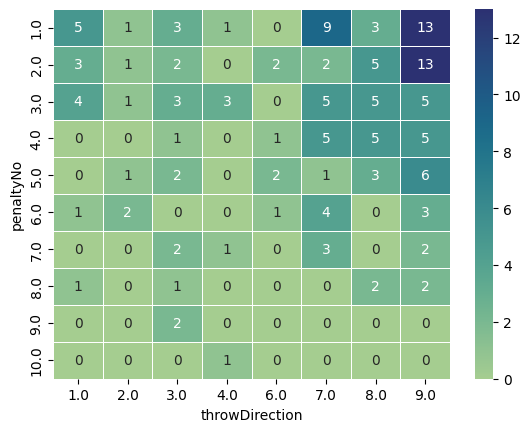

In [8]:
axs = sns.heatmap(pd.crosstab(dfs['penaltyNo'], dfs['throwDirection']), linewidth=0.5, annot=True, cmap="crest")
#ax.xaxis.tick_top()
plt.show()

Failed

In [9]:
dff = df.loc[df['throwSuccess'] == 0]
df3 =pd.crosstab(dff['penaltyNo'], dff['throwDirection'], margins=True, margins_name="Total") 
df3

throwDirection,1.0,2.0,3.0,4.0,6.0,7.0,8.0,9.0,Total
penaltyNo,,,,,,,,,
1.0,1,0,1,0,1,2,1,2,8
2.0,0,1,1,0,0,3,0,5,10
3.0,0,2,0,0,0,0,0,2,4
4.0,0,1,0,0,0,0,1,3,5
5.0,0,0,0,0,0,0,1,0,1
6.0,0,0,1,1,0,0,0,0,2
10.0,0,0,0,0,0,0,0,1,1
Total,1,4,3,1,1,5,3,13,31


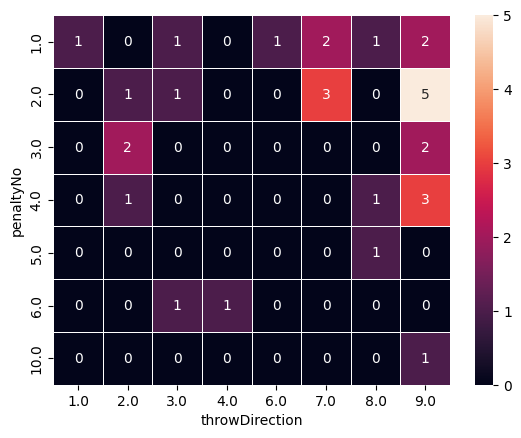

In [10]:
axf = sns.heatmap(pd.crosstab(dff['penaltyNo'], dff['throwDirection']), linewidth=0.5, annot=True)
#ax.xaxis.tick_top()
plt.show()

Percentage Success

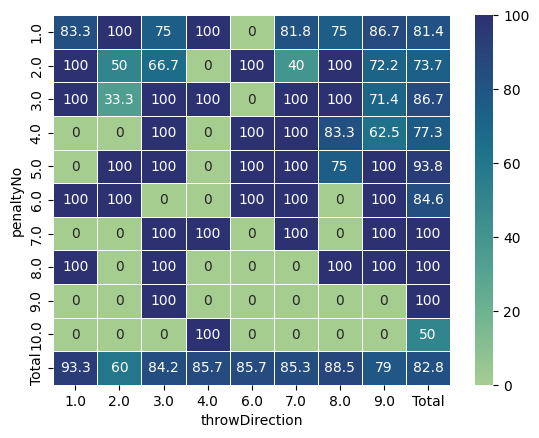

throwDirection,1.0,2.0,3.0,4.0,6.0,7.0,8.0,9.0,Total
penaltyNo,,,,,,,,,
1.0,83.333333,100.000000,75.000000,100.000000,0.000000,81.818182,75.000000,86.666667,81.395349
2.0,100.000000,50.000000,66.666667,0.000000,100.000000,40.000000,100.000000,72.222222,73.684211
3.0,100.000000,33.333333,100.000000,100.000000,0.000000,100.000000,100.000000,71.428571,86.666667
4.0,0.000000,0.000000,100.000000,0.000000,100.000000,100.000000,83.333333,62.500000,77.272727
5.0,0.000000,100.000000,100.000000,0.000000,100.000000,100.000000,75.000000,100.000000,93.750000
6.0,100.000000,100.000000,0.000000,0.000000,100.000000,100.000000,0.000000,100.000000,84.615385
7.0,0.000000,0.000000,100.000000,100.000000,0.000000,100.000000,0.000000,100.000000,100.000000
8.0,100.000000,0.000000,100.000000,0.000000,0.000000,0.000000,100.000000,100.000000,100.000000
9.0,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000


In [11]:
relSuccess = df2/df1*100
relSuccess.replace(np.nan,0,inplace=True)
axrs = sns.heatmap(relSuccess, linewidth=0.5, annot=True, cmap="crest",fmt='.3g')
#ax.xaxis.tick_top()
plt.show()
relSuccess

Pattern